## This time, using pandas

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

## Compute cost function

In [154]:
def compute_cost(X, y, theta): 
    # formula is J(theta0, theta1) = (1/2m) * sum(htheta(xi) - yi)^2
    return (np.sum(np.power( X * theta.T - y, 2))) / (2 * len(X))


## Gradient Descent function

In [155]:
def gradient_descent(X, y, theta, alpha, num_iters):
    temp_theta = np.matrix(np.zeros(theta.shape)) #stores each temp theta calculate
    cost = np.zeros(num_iters) #store all the costs on the way
    
    for iter in range(num_iters):
        sq_error = (X * theta.T) - y

        for param in range(theta.shape[1]):
            term = np.multiply(sq_error,X[:,param])
            temp_theta[0, param] = theta[0,param] - ((alpha/len(X))*(np.sum(term)))
            
        #once computation is done for all thetas, update the theta matrix    
        theta = temp_theta
        cost[iter] = compute_cost(X,y,theta)

    return theta, cost

## Read data from file function

In [156]:
def read_data():
    return pd.read_csv("ex1data2.txt", header=None, names=['Size', '#Rooms', 'Cost'])

In [167]:
data = read_data()

## Normalize all the data using the formula:
data = (data - mean) / stddev

In [168]:
data = (data - data.mean()) / data.std()

## Set alpha and iterations

In [178]:
alpha = 0.02
iters = 500

## Parse the data into X,y,theta

In [169]:
## Get X, y

# add ones column
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X2 = data.iloc[:,0:cols-1]
y2 = data.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

## Perform gradient descent

In [179]:
# perform linear regression on the data set
best_theta, all_costs = gradient_descent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
lowest_cost = compute_cost(X2, y2, best_theta)

print "Best theta =>",best_theta, "\nLowest cost=>",lowest_cost

Best theta => [[ -1.04053881e-16   8.78561968e-01  -4.69749533e-02]] 
Lowest cost=> 0.130703056573


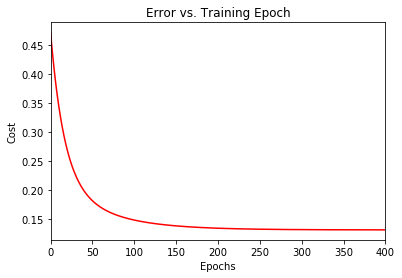

In [180]:
pl.plot(np.arange(iters), all_costs, 'r')
pl.xlabel('Epochs')
pl.ylabel('Cost')
pl.xlim(0,400)
pl.title('Error vs. Training Epoch')
pl.show()

## Try with different alpha

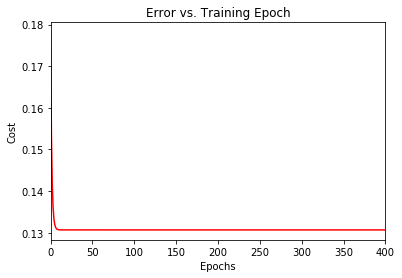

In [181]:
alpha = 0.7
iters = 500
# perform linear regression on the data set
best_theta, all_costs = gradient_descent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
lowest_cost = compute_cost(X2, y2, best_theta)

pl.plot(np.arange(iters), all_costs, 'r')
pl.xlabel('Epochs')
pl.ylabel('Cost')
pl.xlim(0,400)
pl.title('Error vs. Training Epoch')
pl.show()

In [152]:
## Notes

#dataFrame.iloc["rows-range", "cols-range"] 
#example data.iloc[:,3:4] will select all rows, 4th col